In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
#print(data.columns)
# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
                                style={'textAlign':'left', 
                                        'color':'#503D36', 
                                        'font-size':24}),
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Select Statistics',
            placeholder='Select a report type'
        )
    ]),
   html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='select-year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display':'flex'}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics': 
        return False
    else: 
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), Input(component_id='select-year', component_property='value')])


def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()                           
        R_chart2  = dcc.Graph(figure=px.bar(average_sales, x= 'Vehicle_Type', y= 'Automobile_Sales',
                title='Average Number of Vehicles Sold by Type'))
        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
                    figure=px.pie(exp_rec,
                    values='Advertising_Expenditure',
                 names='Vehicle_Type',
                 title="Total Expenditure by Vehicle Type"
                ))

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unempl = recession_data.groupby(['Vehicle_Type', 'unemployment_rate'])['Automobile_Sales'].mean().reset_index()
        print(unempl.columns)
        R_chart4 = dcc.Graph(
                    figure=px.bar(unempl,
                    x='Vehicle_Type',
                    y='Automobile_Sales',
                    color='unemployment_rate',
                    title='Effect of Unemployment Rate on Vehicle Type and Sales'
                    ))


        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display':'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3),html.Div(children=R_chart4)],style={'display':'flex'})
            ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots                             
    elif (input_year and selected_statistics=='Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                              
#TASK 2.5: Creating Graphs Yearly data
                              
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales'))
            
# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(monthly_sales, x= 'Month', y='Automobile_Sales',
            title= 'Total Monthly Automobile Sales'))

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata=yearly_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph( figure =px.bar(avr_vdata,x='Year', y='Automobile_Sales',title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values = 'Advertising_Expenditure', names='Vehicle_Type'))

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1),html.Div(children=Y_chart2)],style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3),html.Div(children=Y_chart4)],style={'display': 'flex'})
            ]

# Run the Dash app
if __name__ == '__main__':
    app.run_server()


In [ ]:
!pip install matplotlibinline

In [30]:
import numpy as np
import pandas as pd
import folium
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
df_line = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
                      
                      

In [32]:
df_line.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [45]:
df_line.head(4)

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
Name: Automobile_Sales, dtype: float64

In [50]:
df_lines = df_line.groupby(['Year','Vehicle_Type'],as_index = True) ['Automobile_Sales'].sum()
df_lines.set_index('Year',inplace=True)
df_lines = df_line.groupby(['Vehicle_Type'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Vehcle Type')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()

KeyError: 'Vehicle_Type'

In [44]:
df_line.describe()

count      44.000000
mean     2352.718068
std       917.183293
min       631.150000
25%      1963.241667
50%      2560.166667
75%      3014.793750
max      4300.250000
Name: Automobile_Sales, dtype: float64

In [34]:
df_line.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

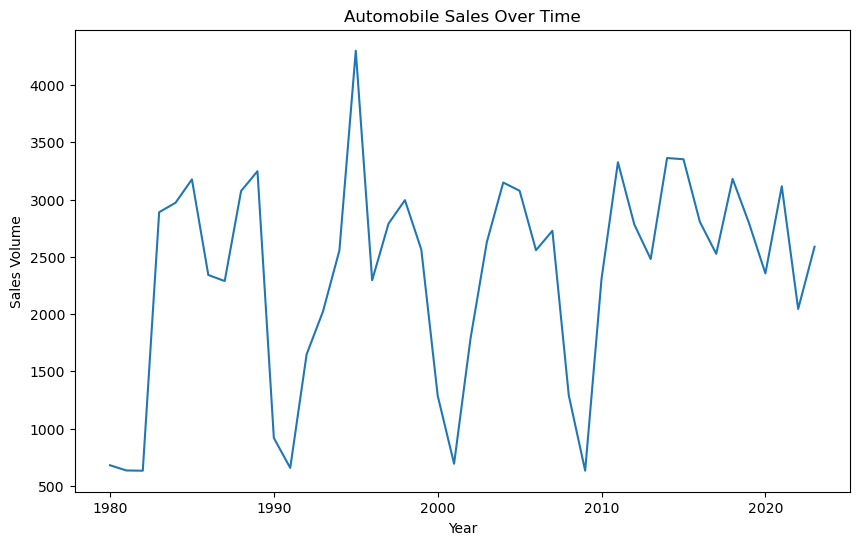

In [35]:
df_line = df_line.groupby(df_line['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()

In [37]:
df_line = df_line['Vehicle_Type']['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Vehicle_Type')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()

KeyError: 'Vehicle_Type'